In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [5]:
from citipy import citipy


In [6]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we add it to the cities list
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count
len(cities)

632

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a2b836591e5c89e5a64916eab39b8364


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | campoverde
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | hutchinson
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | teseney
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | havoysund
Processing Record 12 of Set 1 | bayan
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | horconcitos
Processing Record 18 of Set 1 | galgani
City not found. Skipping...
Processing Record 19 of Set 1 | trofors
Processing Record 20 of Set 1 | flagstaff
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | katherine
Processing 

Processing Record 38 of Set 4 | volzhskiy
Processing Record 39 of Set 4 | roebourne
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | namatanai
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | pyapon
Processing Record 45 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 46 of Set 4 | kyabe
Processing Record 47 of Set 4 | shenjiamen
Processing Record 48 of Set 4 | ziguinchor
Processing Record 49 of Set 4 | kacergine
City not found. Skipping...
Processing Record 50 of Set 4 | amahai
Processing Record 1 of Set 5 | shiraz
Processing Record 2 of Set 5 | bandarbeyla
Processing Record 3 of Set 5 | nikolskoye
Processing Record 4 of Set 5 | yirol
City not found. Skipping...
Processing Record 5 of Set 5 | jardim
Processing Record 6 of Set 5 | codo
Processing Record 7 of Set 5 | kysyl-syr
Processing Record 8 of Set 5 | lethbridge
Processing Record 9 of

Processing Record 29 of Set 8 | bossangoa
Processing Record 30 of Set 8 | bilma
Processing Record 31 of Set 8 | walcz
Processing Record 32 of Set 8 | saldanha
Processing Record 33 of Set 8 | lang son
Processing Record 34 of Set 8 | foso
Processing Record 35 of Set 8 | rancho palos verdes
Processing Record 36 of Set 8 | mineiros
Processing Record 37 of Set 8 | taoudenni
Processing Record 38 of Set 8 | lincoln
Processing Record 39 of Set 8 | la ronge
Processing Record 40 of Set 8 | gamba
Processing Record 41 of Set 8 | lokosovo
Processing Record 42 of Set 8 | ladispoli
Processing Record 43 of Set 8 | togur
Processing Record 44 of Set 8 | chapais
Processing Record 45 of Set 8 | adrar
Processing Record 46 of Set 8 | ust-kuyga
Processing Record 47 of Set 8 | piacabucu
Processing Record 48 of Set 8 | toora-khem
Processing Record 49 of Set 8 | manyana
Processing Record 50 of Set 8 | plouzane
Processing Record 1 of Set 9 | gunjur
Processing Record 2 of Set 9 | catamarca
Processing Record 3 of 

Processing Record 15 of Set 12 | meyungs
City not found. Skipping...
Processing Record 16 of Set 12 | acarau
Processing Record 17 of Set 12 | miri
Processing Record 18 of Set 12 | diveyevo
Processing Record 19 of Set 12 | brokopondo
Processing Record 20 of Set 12 | tondano
Processing Record 21 of Set 12 | mentok
City not found. Skipping...
Processing Record 22 of Set 12 | sinnamary
Processing Record 23 of Set 12 | lagoa
Processing Record 24 of Set 12 | korla
Processing Record 25 of Set 12 | soe
Processing Record 26 of Set 12 | ambon
Processing Record 27 of Set 12 | keskin
Processing Record 28 of Set 12 | laje
Processing Record 29 of Set 12 | acapulco
Processing Record 30 of Set 12 | mecca
Processing Record 31 of Set 12 | skibbereen
Processing Record 32 of Set 12 | gambela
Processing Record 33 of Set 12 | bastia
Processing Record 34 of Set 12 | gilgit
Processing Record 35 of Set 12 | fort nelson
Processing Record 36 of Set 12 | guerrero negro
Processing Record 37 of Set 12 | podor
Proce

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Campoverde,-8.4753,-74.8058,91.40,52,40,9.22,PE,2021-01-28 19:17:50
1,Thompson,55.7435,-97.8558,-4.00,84,75,3.44,CA,2021-01-28 19:17:50
2,Katsuura,35.1333,140.3000,50.00,71,40,12.66,JP,2021-01-28 19:17:50
3,Hutchinson,38.0608,-97.9298,32.00,74,75,19.57,US,2021-01-28 19:14:36
4,Albany,42.6001,-73.9662,25.00,48,62,8.99,US,2021-01-28 19:13:22
5,Mount Gambier,-37.8333,140.7667,64.40,94,90,5.75,AU,2021-01-28 19:17:50
6,Mataura,-46.1927,168.8643,48.00,80,92,8.01,NZ,2021-01-28 19:17:50
7,Norman Wells,65.2820,-126.8329,-31.00,75,20,2.30,CA,2021-01-28 19:15:33
8,Teseney,15.1100,36.6575,78.28,26,1,9.93,ER,2021-01-28 19:17:51
9,Hilo,19.7297,-155.0900,69.80,78,90,9.22,US,2021-01-28 19:17:51


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Campoverde,PE,2021-01-28 19:17:50,-8.4753,-74.8058,91.40,52,40,9.22
1,Thompson,CA,2021-01-28 19:17:50,55.7435,-97.8558,-4.00,84,75,3.44
2,Katsuura,JP,2021-01-28 19:17:50,35.1333,140.3000,50.00,71,40,12.66
3,Hutchinson,US,2021-01-28 19:14:36,38.0608,-97.9298,32.00,74,75,19.57
4,Albany,US,2021-01-28 19:13:22,42.6001,-73.9662,25.00,48,62,8.99
...,...,...,...,...,...,...,...,...,...
577,Sembakung,ID,2021-01-28 19:18:11,3.8167,117.2500,72.12,98,100,1.63
578,Soc Trang,VN,2021-01-28 19:19:25,9.6033,105.9800,75.20,100,100,2.30
579,Knysna,ZA,2021-01-28 19:19:25,-34.0363,23.0471,62.60,77,0,1.14
580,Orsha,BY,2021-01-28 19:19:25,54.5153,30.4053,28.40,100,90,2.24


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

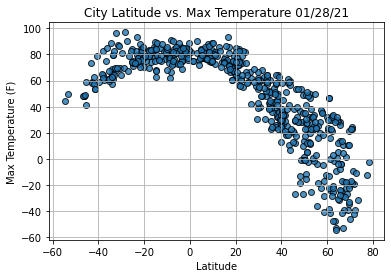

In [17]:
# Import time module
import time

#Build th scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps, 
           edgecolor = "black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

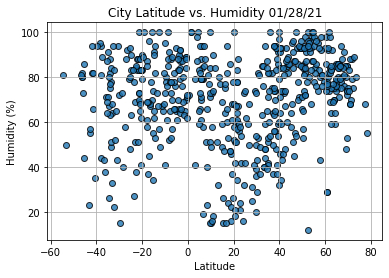

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

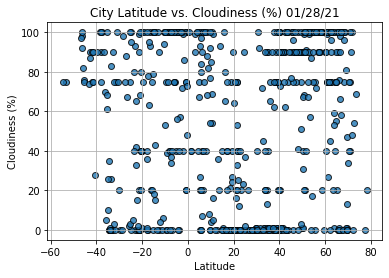

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

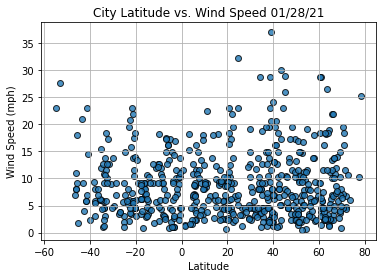

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
#import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress (x_values, y_values)
    
    # Calculate the regression line y values from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                 Longyearbyen
Country                        SJ
Date          2021-01-28 19:17:52
Lat                       78.2186
Lng                       15.6401
Max Temp                     -2.2
Humidity                       55
Cloudiness                     20
Wind Speed                  25.32
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Thompson,CA,2021-01-28 19:17:50,55.7435,-97.8558,-4.0,84,75,3.44
2,Katsuura,JP,2021-01-28 19:17:50,35.1333,140.3000,50.0,71,40,12.66
3,Hutchinson,US,2021-01-28 19:14:36,38.0608,-97.9298,32.0,74,75,19.57
4,Albany,US,2021-01-28 19:13:22,42.6001,-73.9662,25.0,48,62,8.99
7,Norman Wells,CA,2021-01-28 19:15:33,65.2820,-126.8329,-31.0,75,20,2.30


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

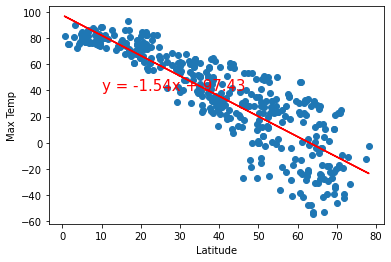

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp', (10,40))

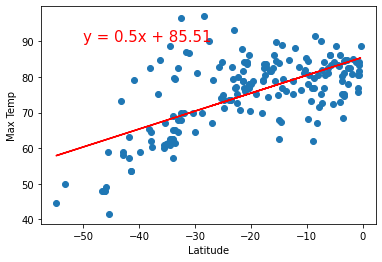

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

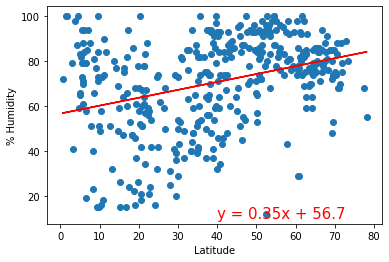

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

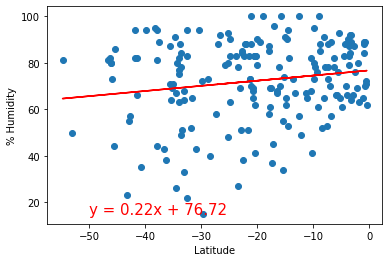

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

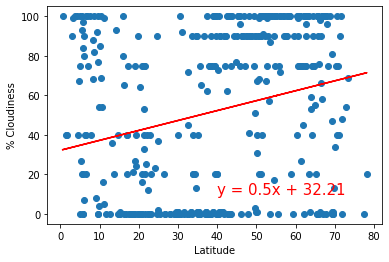

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

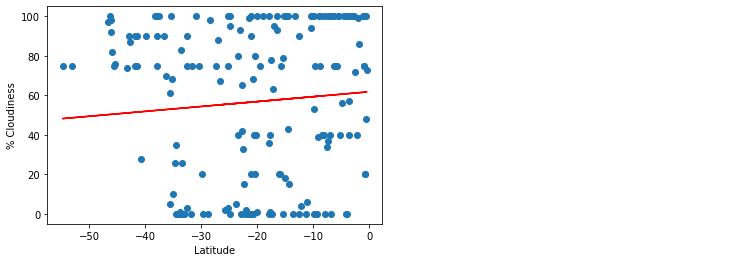

In [39]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

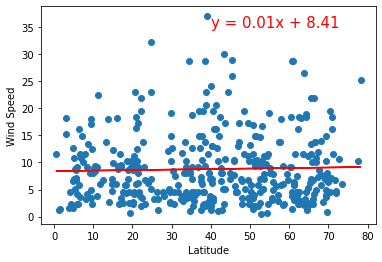

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

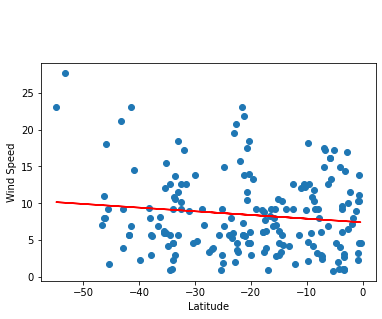

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))